In [1]:
from imagem import Imagem
from glob import glob
import Functions as fc
import numpy as np
from skimage.io import imread,imshow,imsave,imread_collection
import cv2
from skimage.exposure import equalize_hist
from skimage.filters import median
from IPython.display import clear_output
from tqdm import tqdm

In [2]:
originais = sorted(glob(f'./imagens/*/*', recursive=True))

In [23]:
imgs = []
for i in originais:
    img = Imagem(i)
    img.ler()
    img.filtros['eq'] = img.equalize()
    img.filtros['median'] = median(img.filtros['eq'])
    #img.filtros['otsu'] = fc.aplicaOtsu(img.filtros['median'])
    imgs.append(img)
    clear_output(wait=True)

/home/matheus/Área de Trabalho/2022.2/TÓPICOS ESPECIAIS EM VISÃO COMPUTACIONAL/Computacional/Atividade07/Functions.py:73: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (240, 240, 3) looks like that of an RGB image.
  limiar = threshold_otsu(imagem)


In [ ]:
linhas, colunas, dimensoes = imgs[10].filtros['otsu'].shape

for l in range(linhas):
    for c in range(colunas):
        for d in range(dimensoes):
            if imgs[10].filtros['otsu'][l][c][d] == False:
                imgs[10].filtros['otsu'][l][c][d] = 0
            else:
                imgs[10].filtros['otsu'][l][c][d] = 255

In [11]:
imgTeste = Imagem(originais[0])
imgTeste.ler()
imgTeste.filtros['eq'] = imgTeste.equalize()
imgTeste.filtros['median'] = median(imgTeste.filtros['eq'])


o = fc.aplicaOtsu(imgTeste.filtros['median'][:,:,0])
o1 = fc.aplicaOtsu(imgTeste.filtros['median'][:,:,1])
o2 = fc.aplicaOtsu(imgTeste.filtros['median'][:,:,2])

In [16]:
o

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [10]:
def poeInt(imagem):
    linhas, colunas = imagem.shape
    copy = np.zeros((linhas, colunas), dtype=np.uint8)
    for l in range(linhas):
        for c in range(colunas):
                if imagem[l][c] == True:
                    copy[l][c] = 255
    return copy

In [29]:
red = poeInt(o)
green = poeInt(o1)
blue = poeInt(o2)

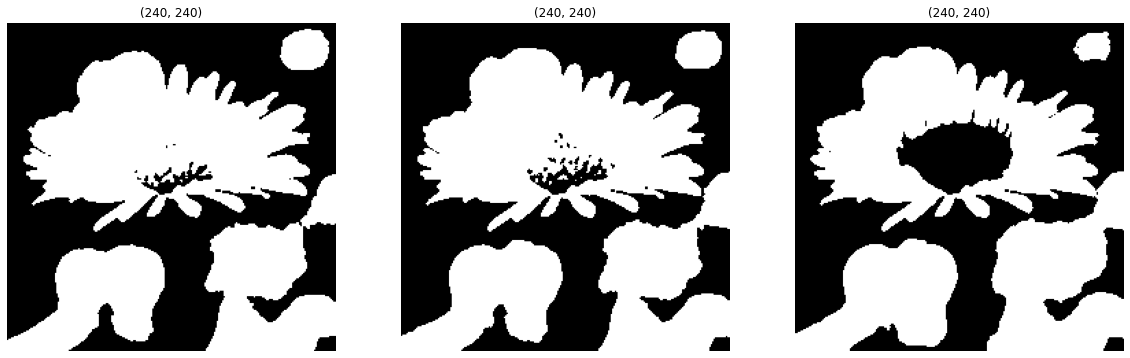

In [39]:
imgTeste.manyShow(
    red, 
    green,
    blue
)

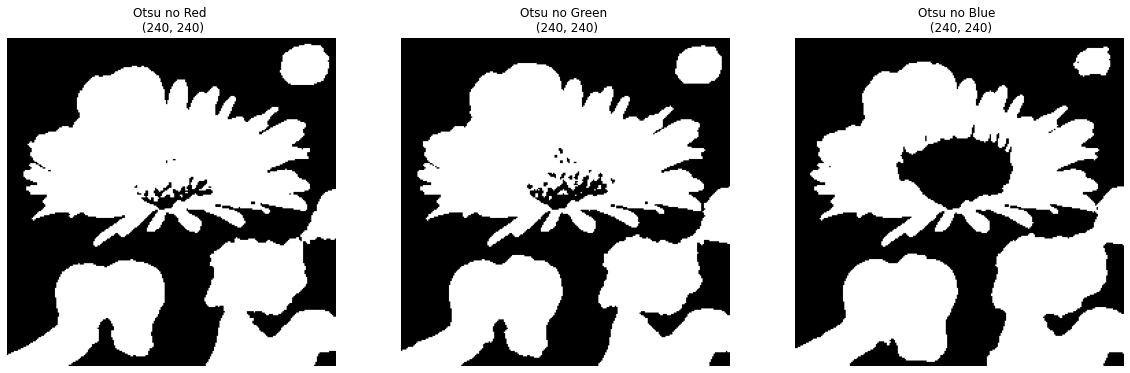

In [40]:
imgTeste.manyShowWithTitle(
    {'img': red, 'title': 'Otsu no Red'},
    {'img': green, 'title': 'Otsu no Green'},
    {'img': blue, 'title': 'Otsu no Blue'}
)

In [66]:
img0 = imgTeste.filtros['median'].copy()
img0 = img0/255
img0 = img0[:,:,0] + img0[:,:,1] + img0[:,:,2]

In [67]:
img1 = o.copy()
img1 = img1/255


In [68]:
img0[~img1.astype(bool)] = 0

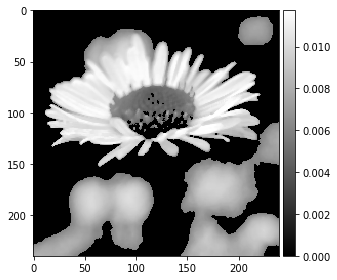

In [69]:
imshow(img0, cmap='gray')